In [1]:
#Задание 1.1
#Даны файлы orders.csv и products.csv. 
#Определите число уникальных продуктов в каждой категории.
#Выведите все продукты в категории "Морепродукты".
#Выведите график числа заказов за каждый прошедший месяц.
#Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)
#Определите продукты с максимальной стоимостью за шт. (не за единицу товара)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
orders_df = pd.read_csv('CSV_files/orders.csv')
products_df = pd.read_csv('CSV_files/products.csv')

In [4]:
orders_df

,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount
0,10248,2007-01-30,11,28.62,12,0.00
1,10248,2007-01-30,42,14.04,10,0.00
2,10248,2007-01-30,72,12.71,5,0.00
3,10249,2006-01-29,14,22.80,9,0.00
4,10249,2006-01-29,51,101.20,40,0.00
...,...,...,...,...,...,...
2167,11083,2006-06-16,37,4.50,7,0.00
2168,11083,2006-06-16,42,15.65,10,0.00
2169,11083,2006-06-16,47,25.50,5,0.00
2170,11083,2006-06-16,51,99.90,3,0.03


In [5]:
products_df

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName
0,1,Банан,10,15.37,20.00,Фрукты
1,2,Апельсин,10,16.17,19.00,Фрукты
2,5,Яблоко,100,4.72,6.00,Фрукты
3,11,Киви,25,21.10,28.00,Фрукты
4,24,Абрикос,100,3.90,4.50,Фрукты
...,...,...,...,...,...,...
72,42,Утка,1,10.95,14.00,Мясо/Птица
73,52,Говядина,14,70.81,80.00,Мясо/Птица
74,56,Свинина,15,34.17,38.00,Мясо/Птица
75,57,Фарш свиной,20,16.14,19.50,Мясо/Птица


In [6]:
#Дата-фрейм, объединяющий оба существующих по ProductID
df_products_and_orders = pd.merge(orders_df, products_df, how = 'inner', on = 'ProductID')

In [7]:
df_products_and_orders

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты
...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты


In [8]:
#Определить число уникальных продуктов в каждой категории
df_products_and_orders['CategoryName'].unique()

array(['Фрукты', 'Мясо/Птица', 'Овощи', 'Крупы', 'Морепродукты',
       'Приправы', 'Кондитерские изделия', 'Молочные продукты'],
      dtype=object)

In [9]:
#Всего уникальных продуктов
df_products_and_orders['ProductName'].nunique()

77

In [10]:
#Функция опреедления количества уникальных продуктов в категории
def uniqueProducts(str):
    return df_products_and_orders.loc[df_products_and_orders['CategoryName'] == str].nunique()['ProductName']

In [11]:
#Уникальных продуктов категории "Фрукты"
uniqueProducts('Фрукты')

9

In [12]:
#Уникальных продуктов категории "Мясо/Птица"
uniqueProducts('Мясо/Птица')

7

In [13]:
#Уникальных продуктов категории "Овощи"
uniqueProducts('Овощи')

16

In [14]:
#Уникальных продуктов категории "Крупы"
uniqueProducts('Крупы')

4

In [15]:
#Уникальных продуктов категории "Морепродукты"
uniqueProducts('Морепродукты')

7

In [16]:
#Уникальных продуктов категории "Приправы"
uniqueProducts('Приправы')

11

In [17]:
#Уникальных продуктов категории "Кондитерские изделия"
uniqueProducts('Кондитерские изделия')

17

In [18]:
#Уникальных продуктов категории "Молочные продукты"
uniqueProducts('Молочные продукты')

6

In [19]:
#Вывести все продукты в категории "Морепродукты"
df_products_and_orders.loc[df_products_and_orders['CategoryName'] == 'Морепродукты']['ProductName'].unique()

array(['Мидии', 'Кальмары', 'Креветки', 'Мидии мини', 'Крабовые палочки',
       'Креветки мини', 'Омары'], dtype=object)

In [20]:
#Вывести график числа заказов за каждый прошедший месяц

#Новый столбец для обозначения номера месяца заказа
df_products_and_orders['Month'] = pd.DatetimeIndex(df_products_and_orders['OrderDate']).month
df_products_and_orders

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,Month
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,1
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,2
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,7
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,6
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,12
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,4
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,5
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,6


In [21]:
#Зависимость количества заказов от месяца
dependence = df_products_and_orders.groupby('Month')['Quantity'].count()
dependence

Month
1     223
2     164
3     179
4     109
5     160
6     144
7     270
8     140
9      77
10    169
11    296
12    241
Name: Quantity, dtype: int64

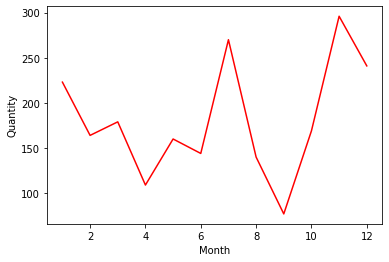

In [22]:
figure, ax = plt.subplots()

dependence.plot(color = 'red') 

ax.set_xlabel('Month')
ax.set_ylabel('Quantity')

plt.show()

In [23]:
#Удаление добавленного ранее столбца
df_products_and_orders = df_products_and_orders.drop('Month', axis = 1)
df_products_and_orders

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты
...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты


In [24]:
#Завести столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). 

#В качестве UnitPrice берется UnitPrice_x (из orders_df)
df_products_and_orders['OrderSum'] =  round(df_products_and_orders['UnitPrice_x'] * df_products_and_orders['Quantity'] * df_products_and_orders['QuantityPerUnit'] * (1 - df_products_and_orders['Discount']), 2)

In [25]:
df_products_and_orders

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.00
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.00
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,29100.00
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,7140.00
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,5718.80
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,15438.75
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.00
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.60


In [43]:
#Определить самые дорогие заказы (сгруппировав по OrderID)

#Общая сумма заказов
total_orderSum = df_products_and_orders.groupby('OrderID')['OrderSum'].sum()

#Сортировка заказов от самых дорогих к самым дешевым
most_expensive_orders = total_orderSum.sort_values(ascending = [False])

In [44]:
#Топ-10 самых дорогих заказов
most_expensive_orders.head(10)

OrderID
10694    175908.00
10607    166597.14
10962    158390.36
10324    147893.39
10402    138134.80
10776    131494.10
11001    128829.00
11077    128578.88
10988    127929.60
10549    127199.78
Name: OrderSum, dtype: float64

In [45]:
#Все заказы от наибольшего к наименьшему
most_expensive_orders

OrderID
10694    175908.00
10607    166597.14
10962    158390.36
10324    147893.39
10402    138134.80
           ...    
10754        51.63
10631        50.62
10602        49.09
10767        26.70
10807        20.11
Name: OrderSum, Length: 836, dtype: float64

In [50]:
#Определить продукты с максимальной стоимостью за шт. (не за единицу товара)

#Продукты с максимальной стоимость за штуку
max_cost = df_products_and_orders.groupby('ProductID')['UnitPrice_x'].max()
max_cost

ProductID
1      21.94
2      20.55
3      21.85
4      24.14
5       6.57
       ...  
73      1.21
74     32.85
75      8.52
76    432.53
77     14.23
Name: UnitPrice_x, Length: 77, dtype: float64

In [51]:
#Сортировка продуктов от наибольшего к наименьшему
max_cost_sorted = max_cost.sort_values(ascending = [False])

In [52]:
#Топ-10 продуктов с максимальной стоимостью за штуку
max_cost_sorted.head(10)

ProductID
76    432.53
29    135.76
51    109.79
20     88.25
38     88.07
52     87.98
44     82.68
53     66.83
39     65.63
67     64.81
Name: UnitPrice_x, dtype: float64

In [53]:
#Все продкуты (максимум за шт.) от наибольшего к наименьшему
max_cost_sorted

ProductID
76    432.53
29    135.76
51    109.79
20     88.25
38     88.07
       ...  
37      4.50
6       4.39
22      3.82
69      2.19
73      1.21
Name: UnitPrice_x, Length: 77, dtype: float64